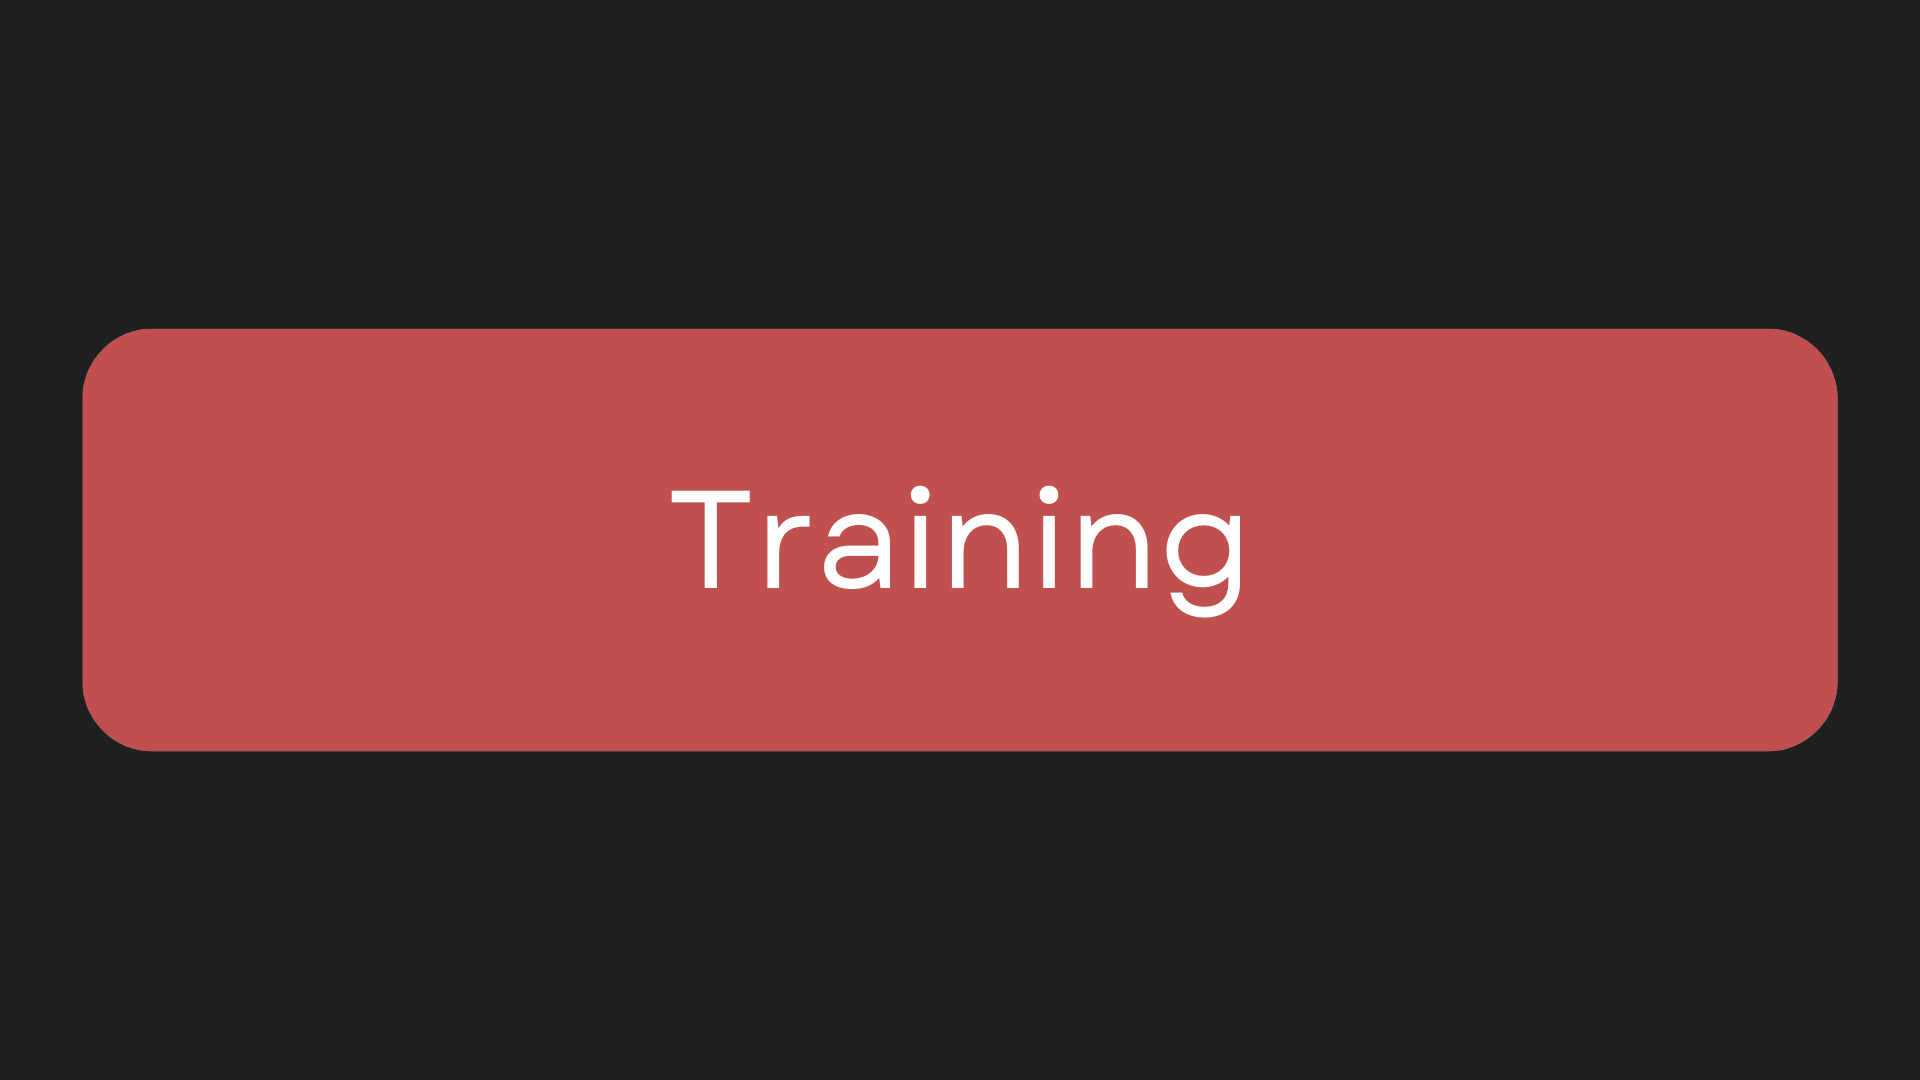

⌛For our training loop, you should:

1. Create a save directory for your model if it doesn't exist already using `os.makedirs(save_path, exist_ok=True)`
2. Move your model to your device (our Azure CPUs)
3. Create the training loop
    - `images` and `captions` as our input and output
    - Zero graidents
    - Forward pass
    - Reshape our outputs (because our outputs are formatted like [seq_len, batch_size, vocab_size] when we want them to be [seq_len * batch_size, vocab_size])
    - Calculate loss
    - Backward pass
    - Prevent exploding gradients with gradient clipping
    - Update weights (`optimizer.step()`) and progress (`num_batch`, `epoch_loss`)
    - Save checkpoints for each epoch and use the epoch with the smallest loss
4. Per epoch, calculate average loss
5. Using `plt`, plot the loss curve


In [ ]:
import torch 
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm 
from torchvision import transforms
from model import CNN_to_LSTM
from preprocess import get_loader
import matplotlib.pyplot as plt
import os

def train_loop(model, dataloader, loss_fn, optimizer, epochs, device, vocab_size, save_path="checkpoints"):
    """    
    Args to remember:
        model: The CNN_to_LSTM model
        dataloader: DataLoader containing images and captions
        loss_fn: Loss function (CrossEntropyLoss)
        optimizer: Optimizer (Adam)
        epochs: Number of training epochs
        device: Device to train on (cuda or cpu)
        vocab_size: Size of vocabulary
        save_path: Path to save model checkpoints
    """
    
    #CODE HERE
    
    # Save final model
    torch.save(model, f"{save_path}/final_model.pt")
    
    return losses


Now it's time to combine all the steps:
  - 🟦Importing
  - 🟧Data Preprocessing
  - 🟩Multimodal AI Building
  - 🟥Training

In [ ]:
if __name__ == "__main__":
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    # Define image preprocessing
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    
    # Get data loader and dataset
    train_loader, dataset = get_loader(
        root_dir="data/images/", 
        captions_file="data/text.csv", 
        transform=transform,
        batch_size=32
    )
    
    # Print vocab size
    vocab_size = len(dataset.vocab)
    print(f"Vocabulary size: {vocab_size}")
    
    # Initialize model
    model = CNN_to_LSTM(
        embed_size=256,
        hidden_size=512,
        num_layers=2,
        vocab_size=vocab_size
    )
    
    # Define loss function and optimizer
    # Ignore padding index (0) in loss calculation
    loss_fn = nn.CrossEntropyLoss(ignore_index=dataset.vocab.word_to_index["<PAD>"])
    optimizer = optim.Adam(model.parameters(), lr=0.003)
    
    # Train model
    losses = train_loop(
        model=model,
        dataloader=train_loader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        epochs=50,
        device=device,
        vocab_size=vocab_size
    )
    
    print("Training completed!")
    print(f"Final model saved to checkpoints/final_model.pt")